In [201]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats

df = pd.read_excel("product_data.xlsx")
df.head()

,Manufacturer,Screen Size,Motion Rate,Pixel,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,...,"size=49""","size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,...,0,0,0,0,0,0,0,0,430,16041
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,...,0,0,0,0,0,0,0,1,535,16364
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,...,0,0,0,0,1,0,0,0,495,15998
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,...,0,0,0,0,1,0,0,1,540,16214
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,...,0,0,0,0,0,1,0,0,545,16343


In [202]:
# Regressing based on Yearly Units Sold
y = df['Yearly units sold in US']
x = df.drop(['Manufacturer', 'Screen Size', 'Motion Rate','Pixel' ,'Yearly units sold in US'], axis = 1)

In [203]:
model = LinearRegression().fit(x,y)

In [204]:
var = x.columns.tolist() # List of reputation dimensions
coef = model.coef_.tolist() # redistributeed reputation value

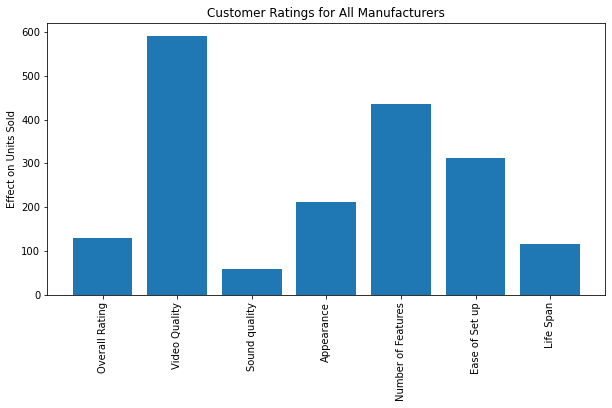

In [205]:
import matplotlib.pyplot as plt
# use a bar chart to display relative impact of reputation dimensions
plt.figure(figsize = (10, 5))
plt.bar(var[0:7], coef[0:7])
plt.title("Customer Ratings for All Manufacturers")
plt.ylabel('Effect on Units Sold')
plt.xticks(rotation = 90)
plt.show()

In [206]:
var.insert(0, 'Intercept')
coef.insert(0, model.intercept_)
out = pd.DataFrame({'Variable': var, 'Coefficient': coef})
print(out)

                 Variable   Coefficient
0               Intercept  10480.026174
1          Overall Rating    129.866577
2           Video Quality    590.426044
3           Sound quality     59.238484
4              Appearance    212.558897
5      Number of Features    435.987545
6          Ease of Set up    312.655093
7               Life Span    116.527290
8   Expert Overall Rating     28.479620
9                size=26"   1007.475260
10               size=32"   2002.103259
11               size=36"   6016.602939
12               size=40"   1012.322244
13               size=42"   8016.864276
14               size=46"  12524.334956
15               size=49"   -480.448968
16               size=52"  -1029.154963
17               size=55"  -1892.546678
18               size=60"  -4978.424788
19         motionrate=120    100.647587
20         motionrate=240    203.665809
21         motionrate=600    303.872318
22             Pixel=1080    355.964377
23          Selling Price     -3.049214


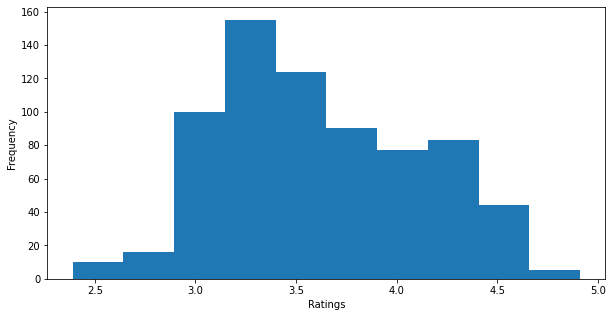

mean: 3.6196
median: 3.5200
90 percentile: 4.3600


In [207]:
df_VideoQuality = df['Video Quality']

plt.figure(figsize=(10, 5))
plt.hist(df_VideoQuality)
plt.ylabel('Frequency')
plt.xlabel('Ratings')
plt.show()

print('mean: %.4f' % np.mean(df_VideoQuality))
print('median: %.4f' % np.median(df_VideoQuality))
print('90 percentile: %.4f' % np.percentile(df_VideoQuality, 90))

In [208]:
#pivot table
t = pd.pivot_table(df, values = ['Overall Rating','Video Quality', 'Sound quality', 'Appearance','Number of Features', 'Ease of Set up','Life Span'], index = ['Manufacturer'], aggfunc= np.mean)
t

,Appearance,Ease of Set up,Life Span,Number of Features,Overall Rating,Sound quality,Video Quality
Manufacturer,,,,,,,
LG,3.971932,3.601591,3.100909,4.225341,3.469545,4.209659,3.415795
Panasonic,3.586818,4.211136,4.637045,3.814205,3.945682,3.503295,4.378523
Philips,4.025114,3.209659,3.595909,2.903636,3.769545,3.889773,3.391364
Samsung,4.220114,3.883636,4.491136,4.378636,4.195568,4.204205,4.131591
Sharp,3.461023,3.191705,3.382955,3.361136,3.397614,3.633750,3.572159
Sony,3.964659,3.728977,4.102045,3.236818,4.323295,4.081591,3.906250
Toshiba,3.482841,3.403409,3.509318,3.433636,3.195341,3.110114,3.056818
Vizio,3.127045,3.400795,3.542273,3.154205,3.233864,2.992386,3.104205


In [209]:
t_panasonic = t.loc['Panasonic','Video Quality']
t_panasonic

4.378522727272728

In [210]:
my_score = stats.percentileofscore(df_VideoQuality, t_panasonic)
print('My score: %.4f' % my_score)

My score: 91.0511


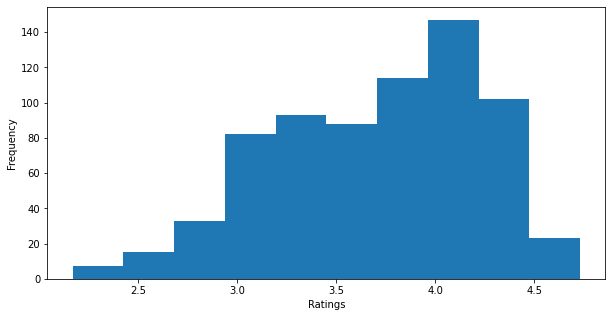

mean: 3.7031
median: 3.7800
90 percentile: 4.3000


In [211]:
df_SoundQuality = df['Sound quality']

plt.figure(figsize=(10, 5))
plt.hist(df_SoundQuality)
plt.ylabel('Frequency')
plt.xlabel('Ratings')
plt.show()

print('mean: %.4f' % np.mean(df_SoundQuality))
print('median: %.4f' % np.median(df_SoundQuality))
print('90 percentile: %.4f' % np.percentile(df_SoundQuality, 90))

In [212]:
t_panasonic_sound = t.loc['Panasonic','Sound quality']
my_score_sound = stats.percentileofscore(df_SoundQuality, t_panasonic_sound)
print('My score: %.4f' % my_score_sound)

My score: 35.3693


From the above Analysis, we can conclude that, Panasonic has outperformed it's competitors when it comes Video Quality. We can see that it exceeds the average customer rating and it is in the top 91 percentile. Hence, we can say that the company does not need to invest in the Video Quality of their television. They get highest sales due to better video quality.  

However, we see that it has a poor sound quality when comparted to it's competitors. It is well below the average when compared with it's other competitors (3.503295) < (3.7031). Infact they are in the 35 percentile score range, which means remaning 65 % of their competitors have better sound quality and ratings. If Panasonic wants to beat it's competitors, it needs to improve its sound quality. This shall increase their customers and hence increase their sales thereby increasing revenue. Hence, Panasonic, must invest in the sound quality of it's product. 

In [213]:
#pivot table
t2 = df.loc[(df['Manufacturer'] == 'Panasonic') & (df['Sound quality'] <= 3.503295)].pivot_table(values = ['Overall Rating','Video Quality', 'Sound quality', 'Appearance','Number of Features', 'Ease of Set up','Life Span'], index = ['Manufacturer','Screen Size','Motion Rate'], aggfunc= np.mean)
t2.sort_values(by=['Sound quality'])

Appearance  Ease of Set up  Life Span  \
Manufacturer Screen Size Motion Rate                                          
Panasonic    26          60                3.550           4.270      4.650   
             19          240               3.790           4.690      4.570   
             42          600               3.760           4.000      4.790   
             40          120               3.445           4.430      4.750   
             46          600               3.480           4.070      4.610   
             19          120               3.450           4.340      4.510   
             55          240               3.400           4.710      4.720   
             52          120               3.330           4.390      4.490   
             32          60                4.070           4.050      4.690   
             36          60                3.490           3.910      4.640   
             19          60                3.470           4.190      4.670   
             49          600               3.830           4.520      4.500   
                         120               3.290           4.090      4.550   
             40          240               3.530           4.125      4.600   
             26          600               3.545           4.130      4.635   
             46          240               3.380           3.940      4.810   
                         120               3.595           4.005      4.610   
             60          120               3.790           4.170      4.660   
             55          60                3.375           4.655      4.675   
             32          120               3.390           4.300      4.760   
             36          240               3.535           4.275      4.700   
             60          60                3.450           4.375      4.620   
             32          240               3.200           4.060      4.620   
             36          120               3.875           4.135      4.580   
             52          240               3.770           4.030      4.560   
             60          240               3.650           4.190      4.480   
             26          120               4.260           3.820      4.500   
                         240               3.240           4.380      4.570   
             42          120               3.480           4.270      4.740   
             19          600               3.660           3.830      4.690   
             52          600               4.055           4.275      4.605   
             40          60                3.550           4.100      4.710   
             46          60                3.500           3.750      4.570   
             42          60                3.620           4.120      4.750   

                                      Number of Features  Overall Rating  \
Manufacturer Screen Size Motion Rate                                       
Panasonic    26          60                        3.920           3.880   
             19          240                       3.740           3.670   
             42          600                       3.360           4.620   
             40          120                       3.870           4.240   
             46          600                       3.310           3.580   
             19          120                       3.530           4.170   
             55          240                       4.140           4.320   
             52          120                       3.700           3.640   
             32          60                        4.380           4.120   
             36          60                        4.060           3.750   
             19          60                        3.710           4.210   
             49          600                       3.780           4.240   
                         120                       3.640           4.150   
             40          240                       3.

Upon further analysis, we find the above products and their respective product aspects, which are well below Panasonic's average customer rating in Sound Quallity (3.503295). Since, we already know that Panasonic's average customer rating is at 35 percentile score, improving sound-quality and investing in the above-mentioned suggested product details would help them to improve their overall rank. This would in-turn increase sales and revenue. 

In [214]:
#Bonus Question
#Segments. 
#Generating the average price between combinations of (Screen Size, Motion, Pixel Rates) across all manufacturers. 
avg_price = pd.pivot_table(df, values = ['Selling Price'],
                       index = ['Screen Size', 'Motion Rate', 'Pixel'], aggfunc = np.mean)
avg_price

Selling Price
Screen Size Motion Rate Pixel               
19          60          720          438.750
                        1080         528.750
            120         720          490.625
                        1080         546.875
            240         720          553.750
                        1080         628.750
            600         720          601.875
                        1080         646.875
26          60          720          495.000
                        1080         575.625
            120         720          565.625
                        1080         605.000
            240         720          608.125
                        1080         671.875
            600         720          633.750
                        1080         736.875
32          60          720          564.375
                        1080         637.500
            120         720          591.875
                        1080         681.875
            240         720          677.500
                        1080         737.500
            600         720          708.750
                        1080         763.125
36          60          720          605.625
                        1080         691.875
            120         720          683.750
                        1080         741.875
            240         720          700.000
                        1080         793.750
            600         720          772.500
                        1080         825.000
40          60          720          684.375
                        1080         772.500
            120         720          738.125
                        1080         790.625
            240         720          769.375
                        1080         835.000
            600         720          830.625
                        1080         894.375
42          60          720          742.500
                        1080         811.875
            120         720          786.875
                        1080         860.000
            240         720          821.875
                        1080         898.750
            600         720          881.250
                        1080         986.250
46          60          720          810.000
                        1080         871.875
            120         720          831.875
                        1080         940.625
            240         720          910.000
                        1080         990.625
            600         720          971.250
                        1080        1005.000
49          60          720          860.625
                        1080         928.125
            120         720          905.000
                        1080         981.875
            240         720          958.750
                        1080        1050.625
            600         720         1021.875
                        1080        1081.875
52          60          720          933.750
                        1080         993.750
            120         720          981.875
                        1080        1060.625
            240         720         1015.000
                        1080        1095.625
            600         720         1063.125
                        1080        1147.500
55          60          720          976.875
                        1080        1053.750
            120         720         1028.750
                        1080        1107.500
            240         720         1088.125
                        1080        1170.625
            600         720         1113.750
                        1080        1203.750
60          60          720         1051.875
                        1080        1115.625
            120         720         1109.375
                        1080        1152.500
            240         720         1136.875
                        1080        1215.625
            600         720         1209.375
                        10

In [215]:
#Converting avg_price Pivot Table to Dataframe. 
avg_df = avg_price.reset_index()
avg_df

,Screen Size,Motion Rate,Pixel,Selling Price
0,19,60,720,438.750
1,19,60,1080,528.750
2,19,120,720,490.625
3,19,120,1080,546.875
4,19,240,720,553.750
5,19,240,1080,628.750
6,19,600,720,601.875
7,19,600,1080,646.875
8,26,60,720,495.000
9,26,60,1080,575.625


In [216]:
#Selling price
selling_df = df[['Screen Size', 'Motion Rate', 'Pixel', 'Selling Price']]
selling_df

,Screen Size,Motion Rate,Pixel,Selling Price
0,19,60,720,430
1,19,60,1080,535
2,19,120,720,495
3,19,120,1080,540
4,19,240,720,545
5,19,240,1080,620
6,19,600,720,610
7,19,600,1080,640
8,26,60,720,490
9,26,60,1080,580


In [217]:
#Merging Dateframes. 

df_merged = pd.merge(avg_df[['Screen Size', 'Motion Rate', 'Pixel','Selling Price']],
                     selling_df[['Screen Size', 'Motion Rate', 'Pixel', 'Selling Price']],
                     how= 'left',
                     left_on = ['Screen Size','Motion Rate', 'Pixel'],
                     right_on = ['Screen Size','Motion Rate', 'Pixel'],
                     suffixes = ['_avg', '_actual'])
df_merged

,Screen Size,Motion Rate,Pixel,Selling Price_avg,Selling Price_actual
0,19,60,720,438.750,430
1,19,60,720,438.750,475
2,19,60,720,438.750,575
3,19,60,720,438.750,540
4,19,60,720,438.750,400
5,19,60,720,438.750,350
6,19,60,720,438.750,365
7,19,60,720,438.750,375
8,19,60,1080,528.750,535
9,19,60,1080,528.750,550


In [218]:
df['Price_Difference'] = df_merged['Selling Price_actual'] - df_merged['Selling Price_avg']
df

,Manufacturer,Screen Size,Motion Rate,Pixel,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,...,"size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US,Price_Difference
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,...,0,0,0,0,0,0,0,430,16041,-8.750
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,...,0,0,0,0,0,0,1,535,16364,36.250
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,...,0,0,0,1,0,0,0,495,15998,136.250
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,...,0,0,0,1,0,0,1,540,16214,101.250
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,...,0,0,0,0,1,0,0,545,16343,-38.750
5,LG,19,240,1080,3.69,3.37,4.20,4.33,4.13,3.58,...,0,0,0,0,1,0,1,620,16183,-88.750
6,LG,19,600,720,3.29,3.52,4.57,3.35,3.82,3.12,...,0,0,0,0,0,1,0,610,15555,-73.750
7,LG,19,600,1080,3.51,3.52,3.71,3.86,4.34,3.92,...,0,0,0,0,0,1,1,640,16396,-63.750
8,LG,26,60,720,3.67,3.65,4.27,3.84,3.77,3.81,...,0,0,0,0,0,0,0,490,17005,6.250
9,LG,26,60,1080,3.28,3.36,4.26,3.93,4.11,4.09,...,0,0,0,0,0,0,1,580,17040,21.250


In [219]:
# Regressing based on Yearly Units Sold
y_2 = df['Price_Difference']
x_2 = df.drop(['Manufacturer', 'Screen Size', 'Motion Rate','Pixel' ,'Price_Difference'], axis = 1)
model_2 = LinearRegression().fit(x_2,y_2)
var_2 = x_2.columns.tolist() # List of reputation dimensions
coef_2 = model_2.coef_.tolist() # redistributeed reputation value

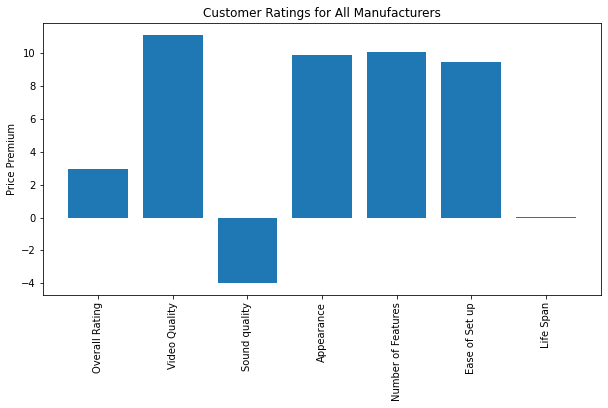

In [220]:
# use a bar chart to display relative impact of reputation dimensions
plt.figure(figsize = (10, 5))
plt.bar(var_2[0:7], coef_2[0:7])
plt.title("Customer Ratings for All Manufacturers")
plt.ylabel('Price Premium')
plt.xticks(rotation = 90)
plt.show()

From the above graph, we can see that customers are willing to pay a premium for better video quality rather than poor sound quality. This also validates our previous findings of why customers are focused on the sound quality of a product across all manufacturers. They are losing almost 4 dollars per product on poor quality from a customer. 

In [221]:
var_2.insert(0, 'Intercept')
coef_2.insert(0, model_2.intercept_)
out_2 = pd.DataFrame({'Variable': var_2, 'Coefficient': coef_2})
print(out_2)

                   Variable  Coefficient
0                 Intercept   217.482630
1            Overall Rating     2.939909
2             Video Quality    11.069824
3             Sound quality    -3.956090
4                Appearance     9.896368
5        Number of Features    10.049526
6            Ease of Set up     9.436634
7                 Life Span     0.053847
8     Expert Overall Rating    -1.976504
9                  size=26"    19.305688
10                 size=32"    37.555488
11                 size=36"   115.107110
12                 size=40"    16.660984
13                 size=42"   151.999290
14                 size=46"   238.601050
15                 size=49"   -15.813627
16                 size=52"   -27.330864
17                 size=55"   -45.497767
18                 size=60"  -106.451677
19           motionrate=120    98.250245
20           motionrate=240   -74.830399
21           motionrate=600   -73.393369
22               Pixel=1080    -9.588563
23            Se

From the above scores, combined with control variables, we can also conclude that customers are willing to pay more for 42 and 46 inch screen size TVs along with better video quality. 

This can be a solid understanding of why customers need wide screen TVs with better video resolutions. Manufacturers should focus on such combinations for 42, 46 inch tvs to increase their sales and revenue. 